In [1]:
!pip install patchify

In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

In [3]:
minmaxscaler = MinMaxScaler()

In [4]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/DubaiDataset'

total 33K
-rw------- 1 root root  548 May 29  2020  classes.json
drwx------ 4 root root 4.0K Aug 19 08:22 'Tile 1'
drwx------ 4 root root 4.0K Aug 19 08:22 'Tile 2'
drwx------ 4 root root 4.0K Aug 19 08:22 'Tile 3'
drwx------ 4 root root 4.0K Aug 19 08:22 'Tile 4'
drwx------ 4 root root 4.0K Aug 19 08:22 'Tile 5'
drwx------ 4 root root 4.0K Aug 19 08:22 'Tile 6'
drwx------ 4 root root 4.0K Aug 19 08:22 'Tile 7'
drwx------ 4 root root 4.0K Aug 19 08:22 'Tile 8'


In [5]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks'

In [6]:
dataset_name = 'DubaiDataset'

In [7]:

for path, subdirs,files in os.walk(dataset_root_folder):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name =='images': #Find all 'images' directories
    images = os.listdir(path) #List of all image names in this subdirectory
    #print(path)
    #print(images)
    for i, images_name in enumerate(images):
      if (images_name.endswith('.jpg')): # only read jpg images
        #print(images_name)
        a = True

In [8]:
image_patch_size =256

In [9]:
# Reading images
image= cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg',1) #1 means the image will be read in color mode

In [10]:
image_pacthes= patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
#len(image_pacthes)
#print(image_pacthes)
print(image_pacthes.shape)

(2, 3, 1, 256, 256, 3)


In [11]:

image_x = image_pacthes[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)

In [12]:
image_y[0].shape

(256, 256, 3)

In [13]:
# checking the initially type of image
print(type(image))

<class 'numpy.ndarray'>


In [14]:
# converting Image type from array using pillow Library
type(Image.fromarray(image))

PIL.Image.Image

array([[[201, 195, 190],
        [225, 219, 214],
        [241, 232, 228],
        ...,
        [255, 236, 231],
        [254, 234, 229],
        [255, 239, 234]],

       [[226, 220, 215],
        [254, 248, 243],
        [255, 255, 251],
        ...,
        [252, 231, 229],
        [247, 228, 223],
        [242, 223, 218]],

       [[248, 241, 238],
        [255, 252, 249],
        [255, 255, 251],
        ...,
        [253, 234, 231],
        [252, 235, 232],
        [245, 228, 225]],

       ...,

       [[211, 200, 203],
        [220, 209, 212],
        [221, 211, 217],
        ...,
        [220, 229, 242],
        [234, 243, 255],
        [235, 244, 255]],

       [[209, 198, 201],
        [219, 208, 211],
        [220, 210, 216],
        ...,
        [213, 222, 235],
        [222, 231, 244],
        [218, 227, 240]],

       [[213, 202, 205],
        [210, 199, 202],
        [201, 191, 197],
        ...,
        [223, 232, 245],
        [233, 242, 255],
        [230, 239, 252]]], dtype=uint8)
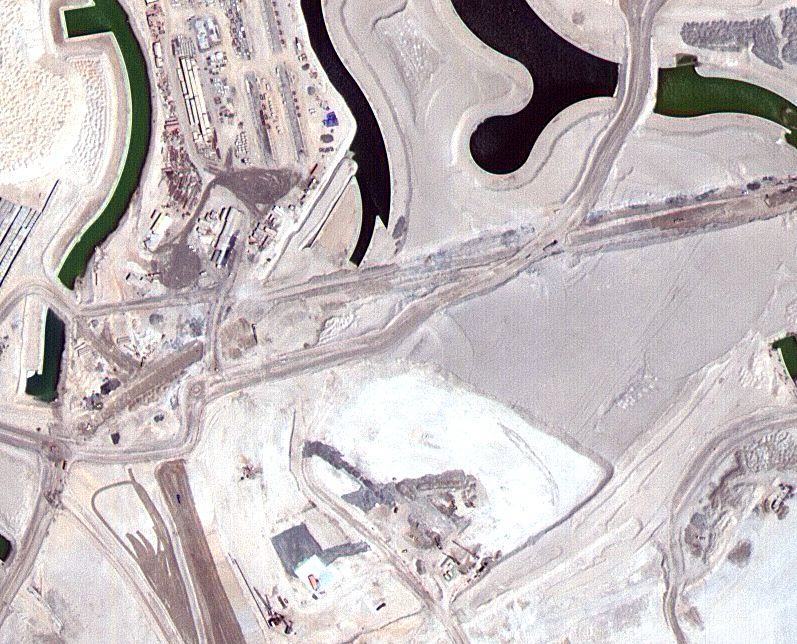

In [15]:
image

In [16]:
# Making the size of images multiple of patch size
(image.shape[0]//image_patch_size)*image_patch_size

512

In [17]:
image_dataset = []
mask_dataset = []
for image_type in ['images','masks']:
  if image_type == 'images':
    image_extension ='jpg'
  elif image_type == 'masks':
    image_extension = 'png'

  for tile_id in range(1, 8):
    for image_id in range(1, 20):
        image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
        if image is not None:
            if image_type == 'masks':
              image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            #print(image.shape)
            size_x = (image.shape[1]//image_patch_size)*image_patch_size
            size_y = (image.shape[0]//image_patch_size)*image_patch_size
            #print('{}--{} - {}'.format(image.shape,size_x,size_y))
            image = Image.fromarray(image)
            image = image.crop((0,0,size_x,size_y))
            #print('({},{})'.format(image.size[0],image.size[1]))
            image = np.array(image)
            patched_image = patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size) #divided Images into small size
            #print(patched_image.shape)
            for i in range(patched_image.shape[0]):
              for j in range(patched_image.shape[1]):

                #print(individual_patched_image.shape)
                if image_type == 'images':
                  individual_patched_image = patched_image[i,j,:,:]
                  individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1,individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                  individual_patched_image = individual_patched_image[0] #dropping extra one from patched image e.g(5,8,1,256,256,3)
                  image_dataset.append(individual_patched_image)
                elif image_type == 'masks':
                  individual_patched_mask = patched_image[i,j,:,:]
                  individual_patched_mask = individual_patched_mask[0]
                  mask_dataset.append(individual_patched_mask)

In [18]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [19]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [20]:
image_dataset[0].shape

(256, 256, 3)

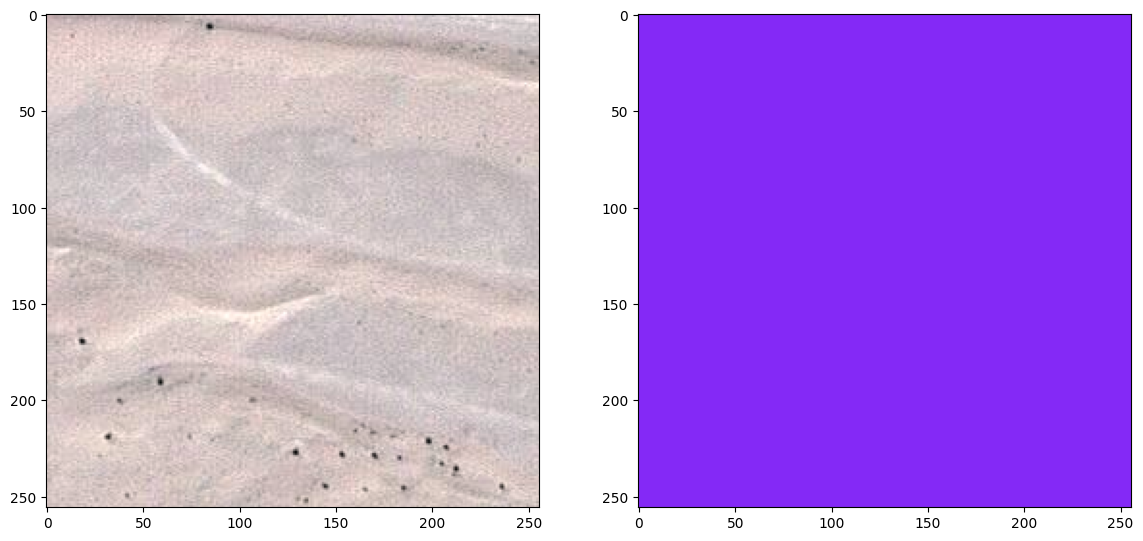

In [21]:
#To verify Images and masks are showing parellaly
random_image_id = random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [22]:
# converting HEX to RGB array for labeling
class_building = '#3C1098'
class_building = class_building.lstrip('#')
#3C 10 98
class_building= np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
#84 29 F6
class_land= np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
#6E C1 E4
class_road= np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))
print(class_road)

class_vegitation = '#FEDD3A'
class_vegitation = class_vegitation.lstrip('#')
#FE DD 3A
class_vegitation= np.array(tuple(int(class_vegitation[i:i+2],16) for i in (0,2,4)))
print(class_vegitation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
#E2 A9 29
class_water= np.array(tuple(int(class_water[i:i+2],16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled .lstrip('#')
#9B 9B 9B
class_unlabeled= np.array(tuple(int(class_unlabeled[i:i+2],16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [23]:
label = individual_patched_mask

In [24]:
# Now replace RGB to integer values to be used as labels
def rgb_to_label(label):
  label_segment = np.zeros(label.shape,dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegitation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  # print(label_segment)
  label_segment = label_segment[:,:,0]
  return label_segment

In [25]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [26]:
print(len(labels))

945


In [27]:
labels = np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
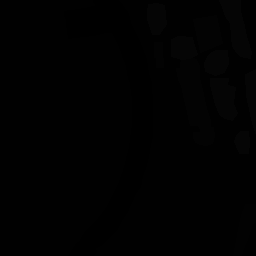

In [28]:
labels[0]

In [29]:
labels = np.expand_dims(labels, axis=3)

In [30]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [31]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

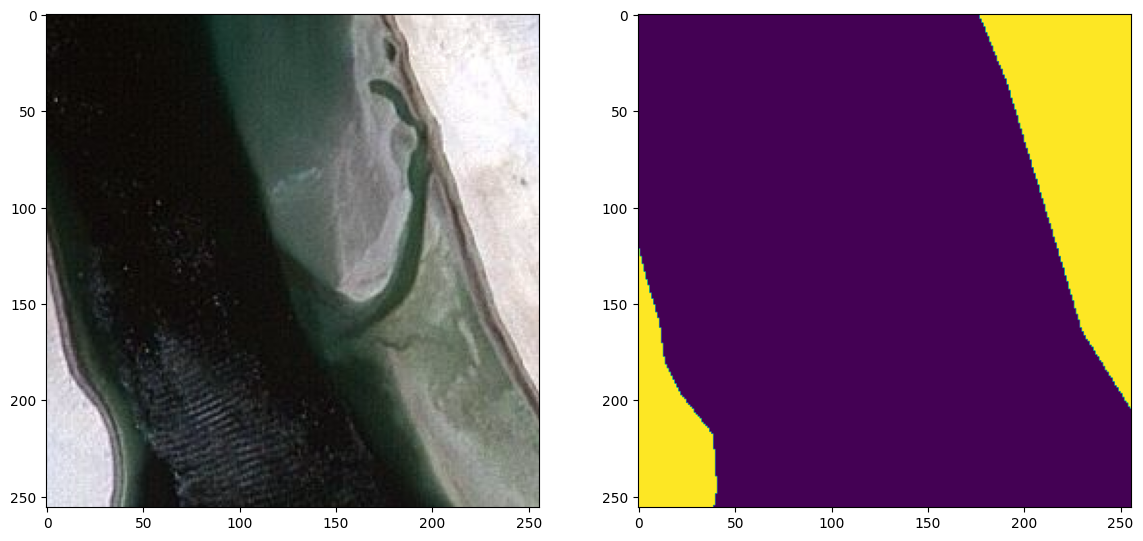

In [32]:
random_image_id = random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(labels[random_image_id][:,:,0])
#plt.imshow(mask_dataset[random_image_id])


In [33]:
print(labels[0][:,:,0])

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [34]:
# Creating Training and Test Splits
# Using the final Image Dataset, generating training and test datasets


In [35]:
total_classes = len(np.unique(labels))

In [36]:
total_classes

6

In [37]:
from tensorflow.keras.utils import to_categorical

In [38]:
labels_categorical_datset = to_categorical(labels, num_classes=total_classes)

In [39]:
labels_categorical_datset.shape

(945, 256, 256, 6)

In [40]:
master_training_dataset = image_dataset

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(master_training_dataset, labels_categorical_datset,test_size=0.15,random_state=100)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [44]:
image_height  = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_classes = y_train.shape[3]

In [45]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [46]:
# Deep Learnig with satellite Imagery Data

**Input:** A layer to define the input shape and format for the network.
**Conv2D**: A 2D convolutional layer (e.g., spatial convolution over images) with parameters such as number of filters, kernel size, and activation function.
**MaxPooling2D:** A 2D max pooling layer, which reduces the spatial dimensions of the input data by taking the maximum value across each window.
**UpSampling2D:** A 2D upsampling layer, which increases the spatial dimensions of the input data by inserting zeros or interpolating values.
**Conv2DTranspose**: A 2D transposed convolutional layer (also known as a convolutional upsampling layer), which performs a convolution and upsampling operation simultaneously.

In [47]:
!!pip install -U segmentation-models


['Requirement already satisfied: segmentation-models in /usr/local/lib/python3.10/dist-packages (1.0.1)',
 'Requirement already satisfied: keras-applications<=1.0.8,>=1.0.7 in /usr/local/lib/python3.10/dist-packages (from segmentation-models) (1.0.8)',
 'Requirement already satisfied: image-classifiers==1.0.0 in /usr/local/lib/python3.10/dist-packages (from segmentation-models) (1.0.0)',
 'Requirement already satisfied: efficientnet==1.0.0 in /usr/local/lib/python3.10/dist-packages (from segmentation-models) (1.0.0)',
 'Requirement already satisfied: scikit-image in /usr/local/lib/python3.10/dist-packages (from efficientnet==1.0.0->segmentation-models) (0.23.2)',
 'Requirement already satisfied: numpy>=1.9.1 in /usr/local/lib/python3.10/dist-packages (from keras-applications<=1.0.8,>=1.0.7->segmentation-models) (1.26.4)',
 'Requirement already satisfied: h5py in /usr/local/lib/python3.10/dist-packages (from keras-applications<=1.0.8,>=1.0.7->segmentation-models) (3.11.0)',
 'Requiremen

In [48]:
from keras.models import Model
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers import concatenate,BatchNormalization,Dropout,Lambda

In [49]:
from keras import backend as k

In [50]:
#Evaulation matrix: Jaccard Index
def Jaccard_coef(y_true,y_pred):
  y_true_flatten = k.flatten(y_true)
  y_pred_flatten = k.flatten(y_pred)
  intersection = k.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (k.sum(y_true_flatten) + k.sum(y_pred_flatten)- intersection + 1.0)
  return final_coef_value


In [51]:
def multi_unet_model(n_classes=5,image_height=256,image_width=256,image_channels=1):
  input = Input((image_height,image_width,image_channels))
  source_input = input
  c1 = Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(source_input)
  c1 = Dropout(.2)(c1)
  c1 = Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c1)
  #maxpooling
  p1 = MaxPooling2D((2,2))(c1)


  c2 = Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p1)
  c2 = Dropout(.2)(c2)
  c2 = Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c2)
  #maxpooling
  p2 = MaxPooling2D((2,2))(c2)


  c3 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p2)
  c3 = Dropout(.2)(c3)
  c3 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c3)
  #maxpooling
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p3)
  c4 = Dropout(.2)(c4)
  c4 = Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c4)
  #maxpooling
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p4)
  c5 = Dropout(.2)(c5)
  c5 = Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c5)

  u6 = Conv2DTranspose(128,(2,2), strides = (2,2), padding='same')(c5)
  u6 = concatenate([u6,c4])
  c6 = Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c6)

  u7 = Conv2DTranspose(64,(2,2), strides = (2,2), padding='same')(c6)
  u7 = concatenate([u7,c3])
  c7 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c7)

  u8 = Conv2DTranspose(32,(2,2), strides = (2,2), padding='same')(c7)
  u8 = concatenate([u8,c2])
  c8 = Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c8)

  u9 = Conv2DTranspose(16,(2,2), strides = (2,2), padding='same')(c8)
  u9 = concatenate([u9,c1])
  c9 = Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c9)

  #output of convulation
  output = Conv2D(n_classes,(1,1),activation='softmax')(c9)
  model = Model(inputs=[input], outputs=[output])
  return model


In [52]:
# setting Model Metrics
# we will be creating the models as soon as metrics are set

In [53]:
metrics = ['accuracy', Jaccard_coef]

In [54]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [55]:
model = get_deep_learning_model()

In [56]:
# model.get_config()

In [57]:
# Custom Loss function
# dice Loss > Focal Loss > Total Loss, Total Loss = (Dice Loss + (1*Focal Loss))

In [58]:
weights = [0.166,0.166,0.166,0.166,0.166,0.166]

In [59]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [60]:
dice_loss = sm.losses.DiceLoss(class_weights=weights)


In [61]:
focal_loss = sm.losses.CategoricalFocalLoss()


In [62]:
total_loss = dice_loss + (1* focal_loss)

Model Compilation

In [63]:
import tensorflow as tf

In [64]:
tf.keras.backend.clear_session()

In [65]:
model.compile(optimizer='adam', loss=total_loss, metrics= metrics)

In [66]:
model

<Functional name=functional, built=True>

Model Training

In [ ]:
model_history = model.fit(x_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data=(x_test, y_test),
                          shuffle=False)

In [ ]:
history_a = model_history

In [ ]:
history_a.history

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs= range(1, len(loss)+ 1)
plt.plot(epochs, loss,'y', label='Trainig Loss')
plt.plot(epochs, val_loss,'r',label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
Jaccard_coef= history_a.history['Jaccard_coef']
val_Jaccard_coef = history_a.history['val_Jaccard_coef']
epochs= range(1, len(Jaccard_coef) + 1)
plt.plot(epochs, Jaccard_coef,'y', label='Trainig IoU')
plt.plot(epochs, val_Jaccard_coef,'r',label = 'validation IoU')
plt.title('Training and validation Iou ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()